In [3]:
#1. Load the data into a pandas dataframe.


In [35]:
import pandas as pd;
import numpy  as np;
import scipy.integrate;
import matplotlib.pyplot as plt;
import copy;
from   sklearn.metrics       import mean_squared_error, mean_absolute_error;
from   sklearn.linear_model  import LinearRegression, BayesianRidge;
from   sklearn.tree          import DecisionTreeRegressor;


In [4]:
dir_str = "covid_19_data.csv";
df_orig = pd.read_csv(dir_str, error_bad_lines = False);
print(df_orig);
#print(df_orig.columns)

         SNo ObservationDate Province/State  Country/Region  \
0          1      01/22/2020          Anhui  Mainland China   
1          2      01/22/2020        Beijing  Mainland China   
2          3      01/22/2020      Chongqing  Mainland China   
3          4      01/22/2020         Fujian  Mainland China   
4          5      01/22/2020          Gansu  Mainland China   
...      ...             ...            ...             ...   
10666  10667      03/31/2020        Wyoming              US   
10667  10668      03/31/2020       Xinjiang  Mainland China   
10668  10669      03/31/2020          Yukon          Canada   
10669  10670      03/31/2020         Yunnan  Mainland China   
10670  10671      03/31/2020       Zhejiang  Mainland China   

               Last Update  Confirmed  Deaths  Recovered  
0          1/22/2020 17:00        1.0     0.0        0.0  
1          1/22/2020 17:00       14.0     0.0        0.0  
2          1/22/2020 17:00        6.0     0.0        0.0  
3      

C:\Users\Likhith\AppData\Local\Temp\ipykernel_9568\1662566907.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_orig = pd.read_csv(dir_str, error_bad_lines = False);


In [ ]:

#2. new dataframe which counts the cumulative total number of cases, the cumulative total number of deaths, and also cumulative total number of recoveries for each date.

In [5]:
df = copy.deepcopy(df_orig);
del df['Last Update'];
date_lst  = df.ObservationDate.unique();
date_dict = {}
#len(date_lst) # 70 dates
for i in range(len(date_lst)):
    df_temp = df.loc[df['ObservationDate'] == date_lst[i]];
    date_dict[date_lst[i]] = df_temp;
#print(date_dict)

In [6]:
date_tot_tup_dict = {};
for date, df in date_dict.items():
    tup_temp = (df['Confirmed'].sum(), df['Deaths'].sum(), df['Recovered'].sum())
    date_tot_tup_dict[date] = tup_temp;
#print(date_tot_tup_dict);
    

In [7]:
df_date_tots = pd.DataFrame(date_tot_tup_dict);
df_date_tots = df_date_tots.transpose();
df_date_tots.columns = ['Confirmed', 'Deaths', 'Recovered'];
print(df_date_tots)

            Confirmed   Deaths  Recovered
01/22/2020      555.0     17.0       28.0
01/23/2020      653.0     18.0       30.0
01/24/2020      941.0     26.0       36.0
01/25/2020     1438.0     42.0       39.0
01/26/2020     2118.0     56.0       52.0
...               ...      ...        ...
03/27/2020   593291.0  27198.0   130915.0
03/28/2020   660706.0  30652.0   139415.0
03/29/2020   720117.0  33925.0   149082.0
03/30/2020   782365.0  37582.0   164566.0
03/31/2020   857487.0  42107.0   178034.0

[70 rows x 3 columns]


In [ ]:
#3. Plot the total number of cases per day over time and summarize your findings

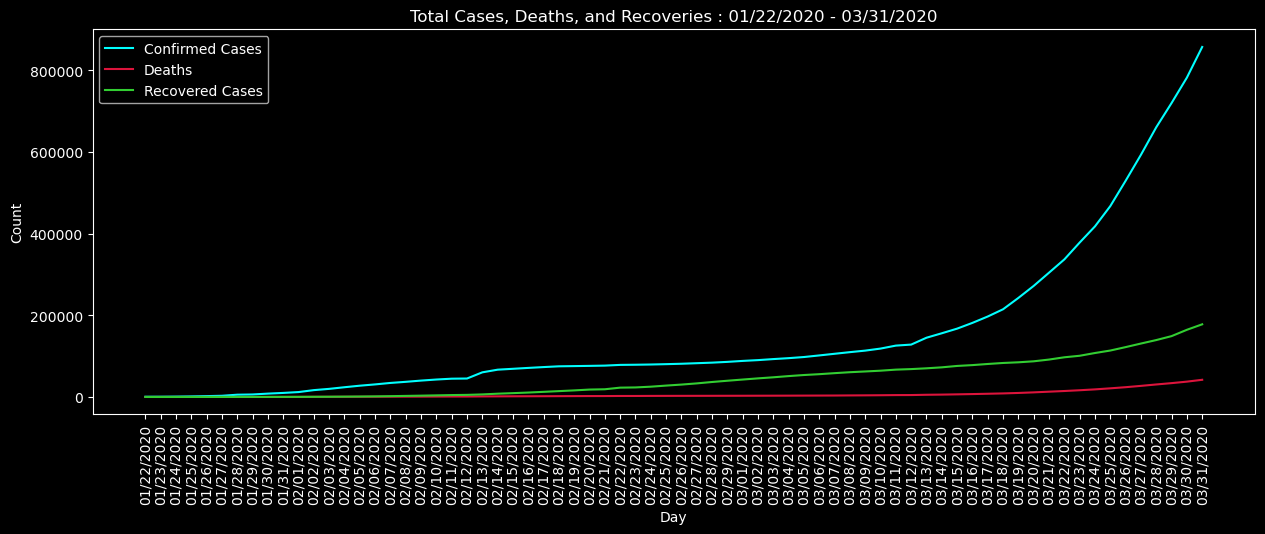

In [8]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
plt.plot(df_date_tots['Confirmed'], label = "Confirmed Cases", color = 'cyan')
plt.plot(df_date_tots['Deaths'], label    = "Deaths", color = 'crimson')
plt.plot(df_date_tots['Recovered'], label = "Recovered Cases", color = 'limegreen')
#plt.grid();
plt.legend();
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation = 90);
start_date = str(date_lst[0]);
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Total Cases, Deaths, and Recoveries : " + start_date + " - " + fin_date);

In [ ]:
#4. Create a new column in the dataframe called “closed cases”

In [9]:
df_date_tots['Closed Cases'] = df_date_tots['Deaths'] + df_date_tots['Recovered'];
#print(df_date_tots)

In [ ]:
#5. Create a new column in the dataframe called “active cases”

In [10]:
df_date_tots['Active Cases'] = df_date_tots['Confirmed'] - df_date_tots['Closed Cases']

In [ ]:
#6. Create one plot showing the trend of number of active cases and closed cases

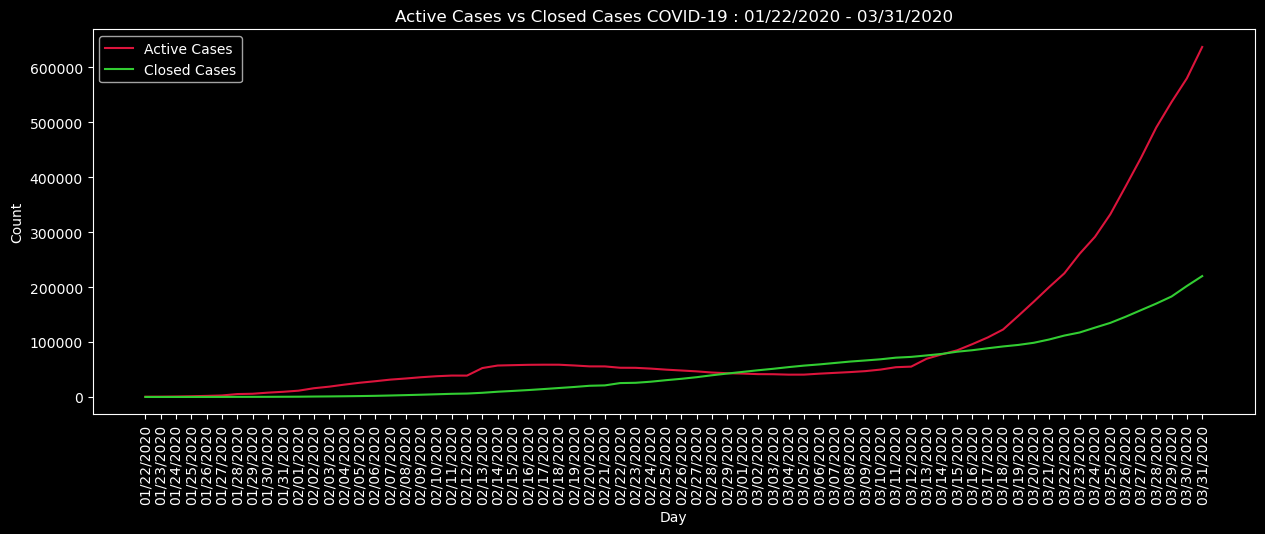

In [11]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
plt.plot(df_date_tots['Active Cases'], label = "Active Cases", color = 'crimson')
plt.plot(df_date_tots['Closed Cases'], label = "Closed Cases", color = 'limegreen')
#plt.grid();
plt.legend();
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation = 90);
start_date = str(date_lst[0]);
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Active Cases vs Closed Cases COVID-19 : " + start_date + " - " + fin_date);

In [ ]:
#7. Growth Factor

In [12]:
growth_len_lst = len(date_lst) - 1; # 69
confirmed_lst = df_date_tots["Confirmed"];
death_lst = df_date_tots["Deaths"];
recovered_lst = df_date_tots["Recovered"];
confGF_lst = []
deathsGF_lst = []
recovGF_lst = []
for i in range(growth_len_lst):
    confirmedGF = confirmed_lst[i+1] / confirmed_lst[i] ;
    confGF_lst.append(confirmedGF)
    deathGF = death_lst[i+1] / death_lst[i] ;
    deathsGF_lst.append(deathGF)
    recoveredGF = recovered_lst[i+1] / recovered_lst[i] ;
    recovGF_lst.append(recoveredGF);
  

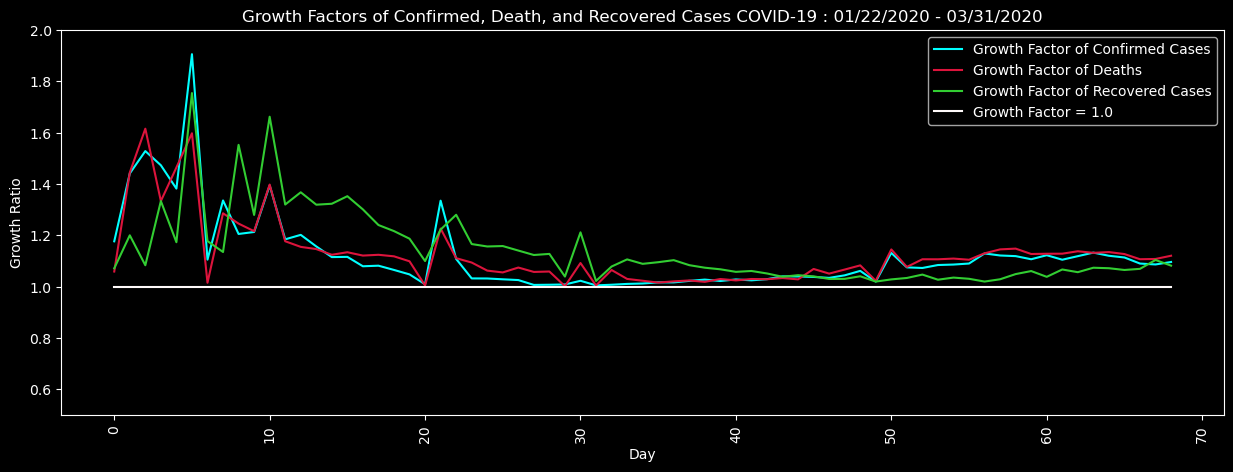

In [13]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
plt.plot(confGF_lst, label = "Growth Factor of Confirmed Cases", color = 'cyan')
plt.plot(deathsGF_lst, label = "Growth Factor of Deaths", color = 'crimson')
plt.plot(recovGF_lst, label = "Growth Factor of Recovered Cases", color = 'limegreen')
x = []
for i in range((growth_len_lst)):
    x.append(1);
plt.plot(x, label = "Growth Factor = 1.0", color = 'snow')
#plt.grid();
plt.legend();
plt.xlabel("Day")
plt.ylabel("Growth Ratio")
plt.ylim(.5,2)
plt.xticks(rotation = 90);
start_date = str(date_lst[0]);
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Growth Factors of Confirmed, Death, and Recovered Cases COVID-19 : " +
          start_date +
          " - " +
          fin_date);

In [ ]:
#Part 2 - Prediction Using Linear Regression

In [25]:
days_since_lst = [];
for i in range(len(date_lst)):
    days_since_lst.append(i);
df_date_tots["Days Since:"] = days_since_lst;
df_date_tots = df_date_tots[["Days Since:", "Confirmed", "Deaths", "Recovered", "Active Cases", "Closed Cases"]];
#print(df_date_tots)

In [ ]:
#8. Take the earliest 85% of the dates as train and the rest as test

In [26]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV;
from sklearn.preprocessing import StandardScaler;
#df_date_tots_cp = copy.deepcopy(df_date_tots);
#X = df_date_tots_cp.drop("Days Since:", axis = 1)

# -----------------------------------------------------------------
X = np.array(df_date_tots["Confirmed"])#.reshape(-1,1)
# X is the world cases array
y = np.array(df_date_tots["Days Since:"]).reshape(-1,1)
# y is the day count array associated with the world cases array


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15,shuffle = False)
# shuffle = False lets the data be split in order

In [ ]:
#Linear Regression

In [33]:
lin_model = LinearRegression(fit_intercept = False);
lin_model.fit(y_train, X_train);
test_lin_pred = lin_model.predict(y_test)


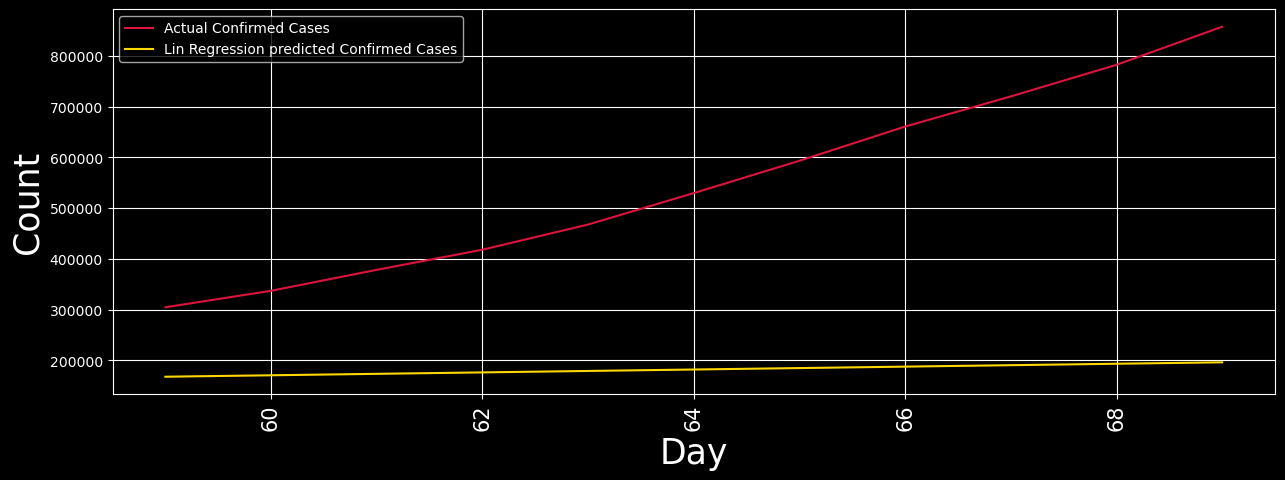

MAE: 368049.30417332525
MSE: 164288029427.18597


In [34]:

plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
# plotting the actual values for the future days
plt.plot(y_test,X_test,label = "Actual Confirmed Cases",color = 'crimson')

test_lin_pred = lin_model.predict(y_test)

# plotting the predicited values for the future days
plt.plot(y_test,test_lin_pred,label = "Lin Regression predicted Confirmed Cases",color = 'gold')

plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error (test_lin_pred, X_test))
print('MSE:', mean_squared_error  (test_lin_pred, X_test))